In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, unique
from matplotlib.ticker import MultipleLocator
from matplotlib.backends.backend_pdf import PdfPages

## Plot the single-dish HI spectra.
* Blue: EDGE GBT
* Red: Springob ALFALFA
* Orange: Masters GBT

In [2]:
#line = 'co'
sources = ['edge2015', 'shg2005', 'm2014']
colors   = ['blue', 'red', 'orange']
nx=7
ny=5

Number of galaxies: 161


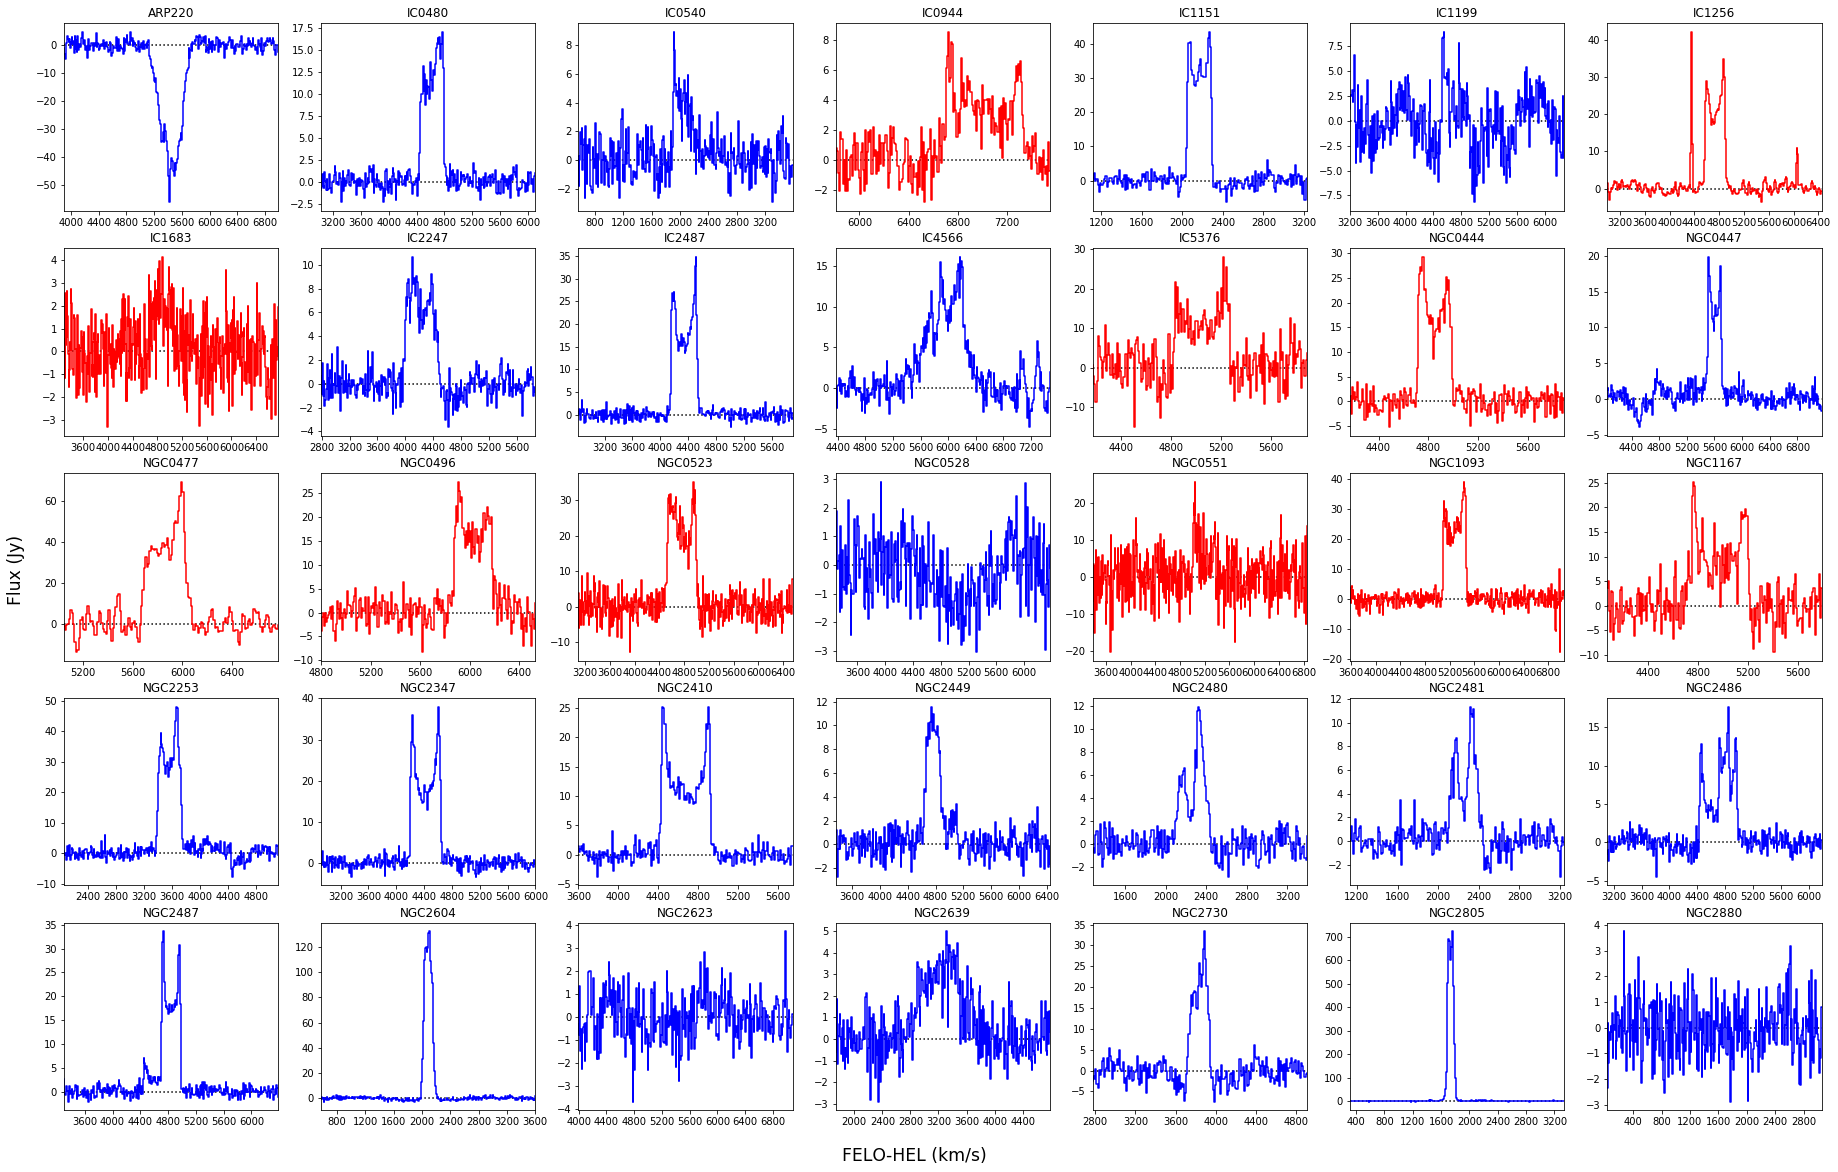

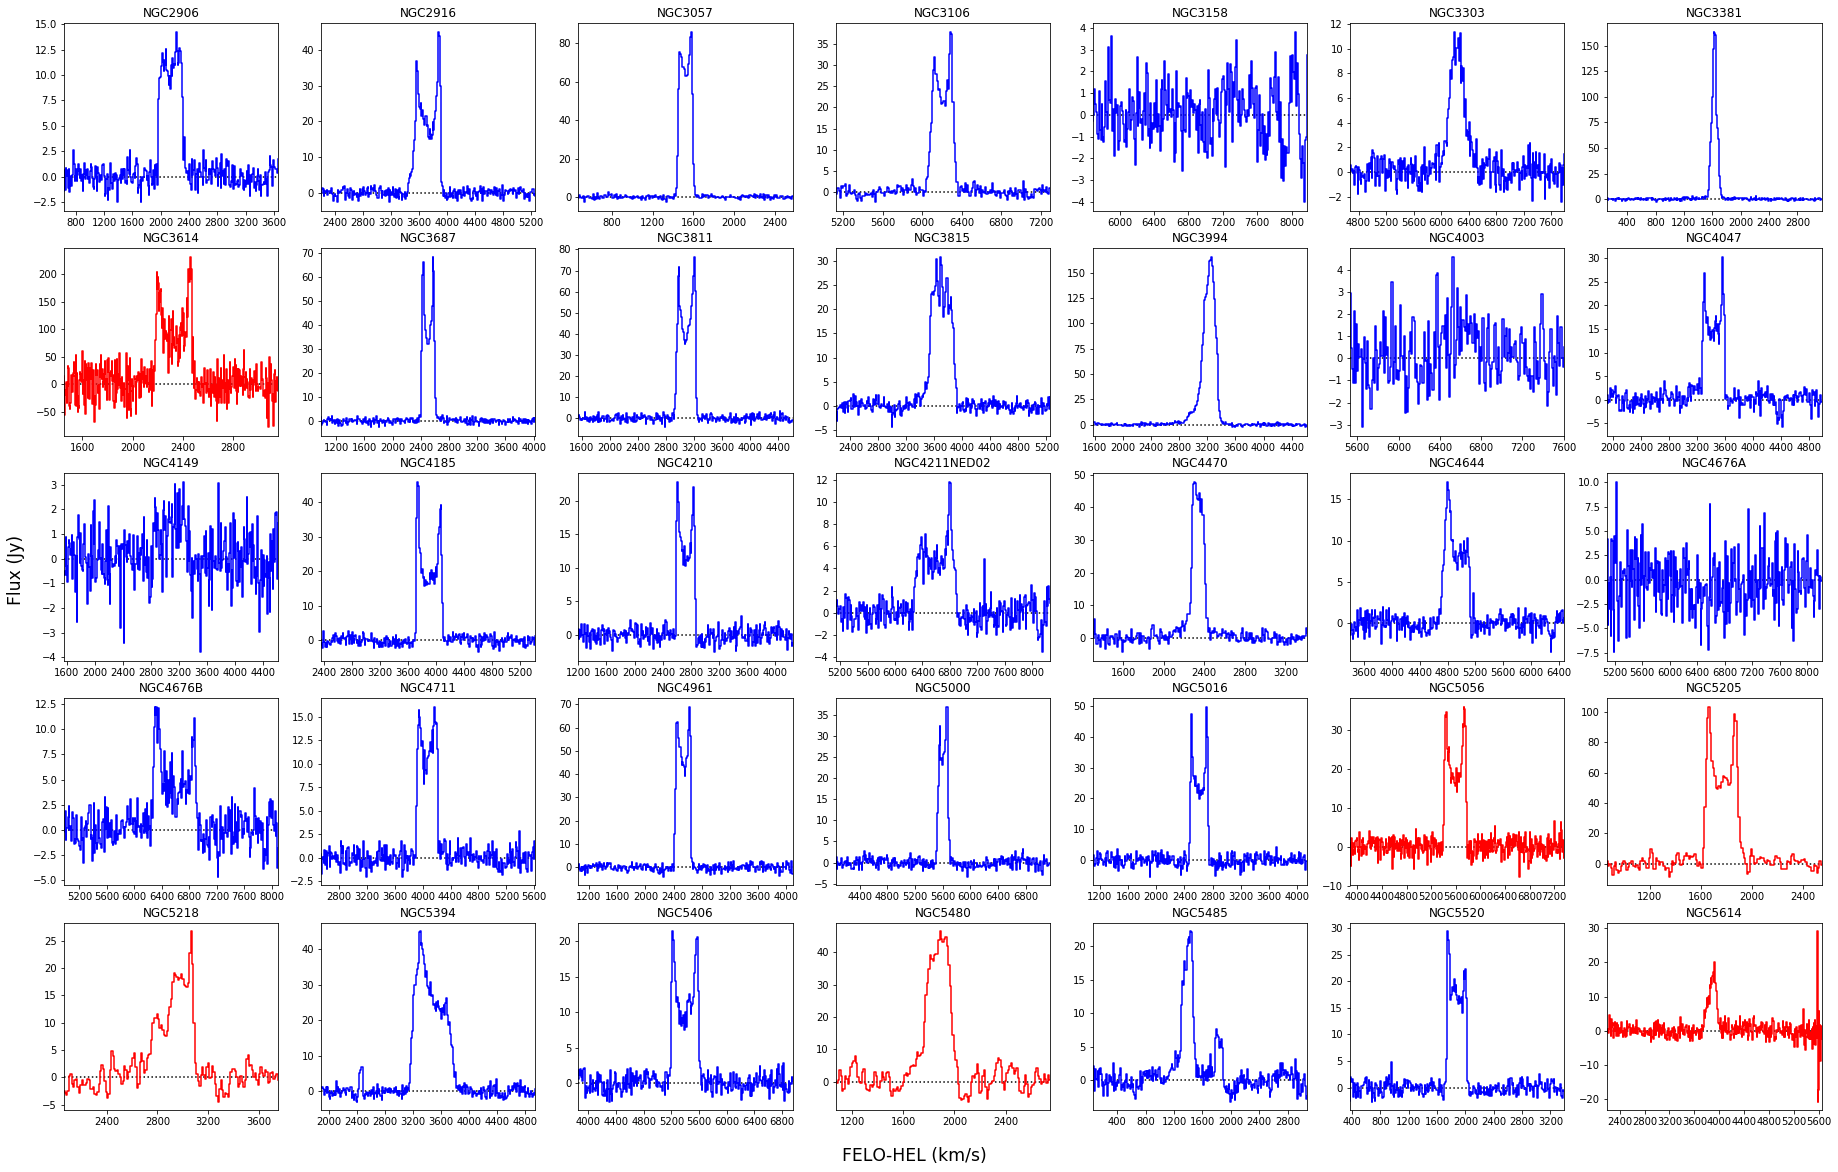

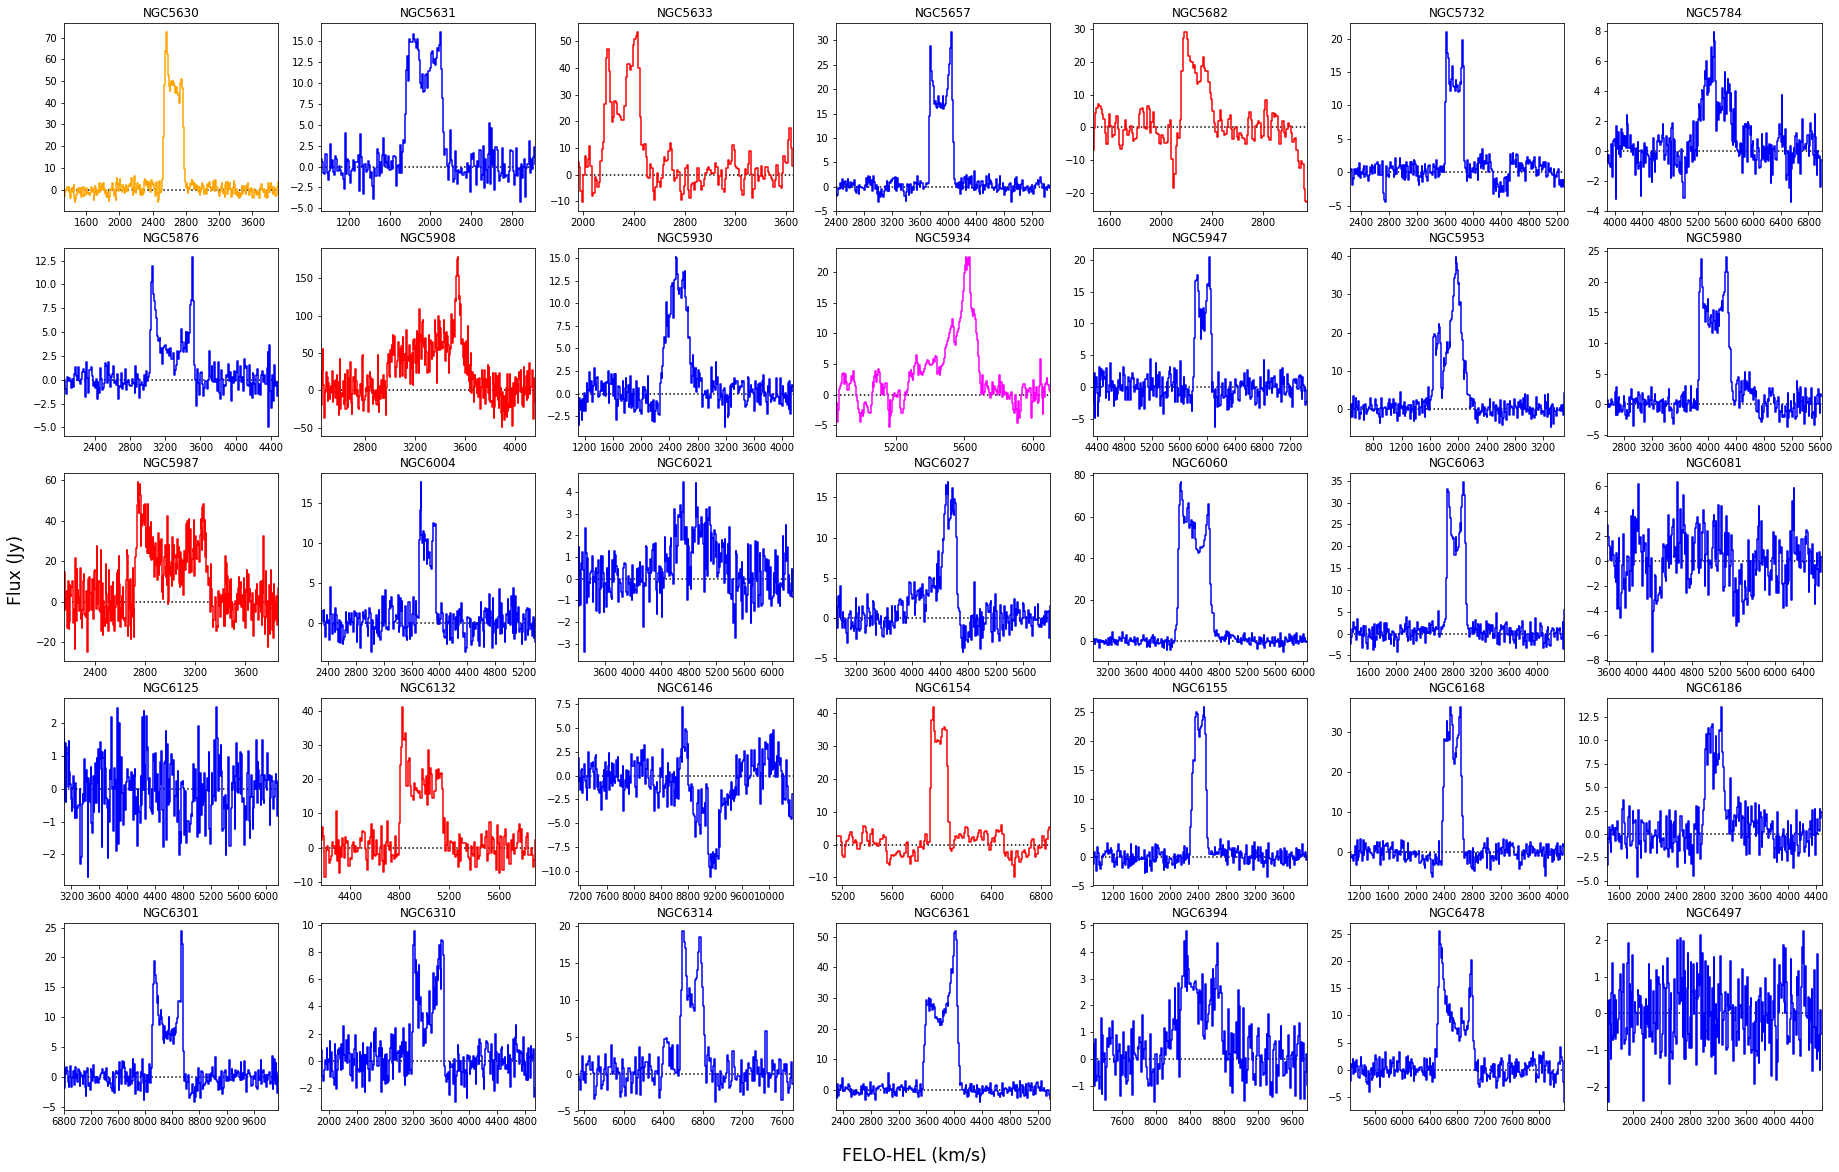

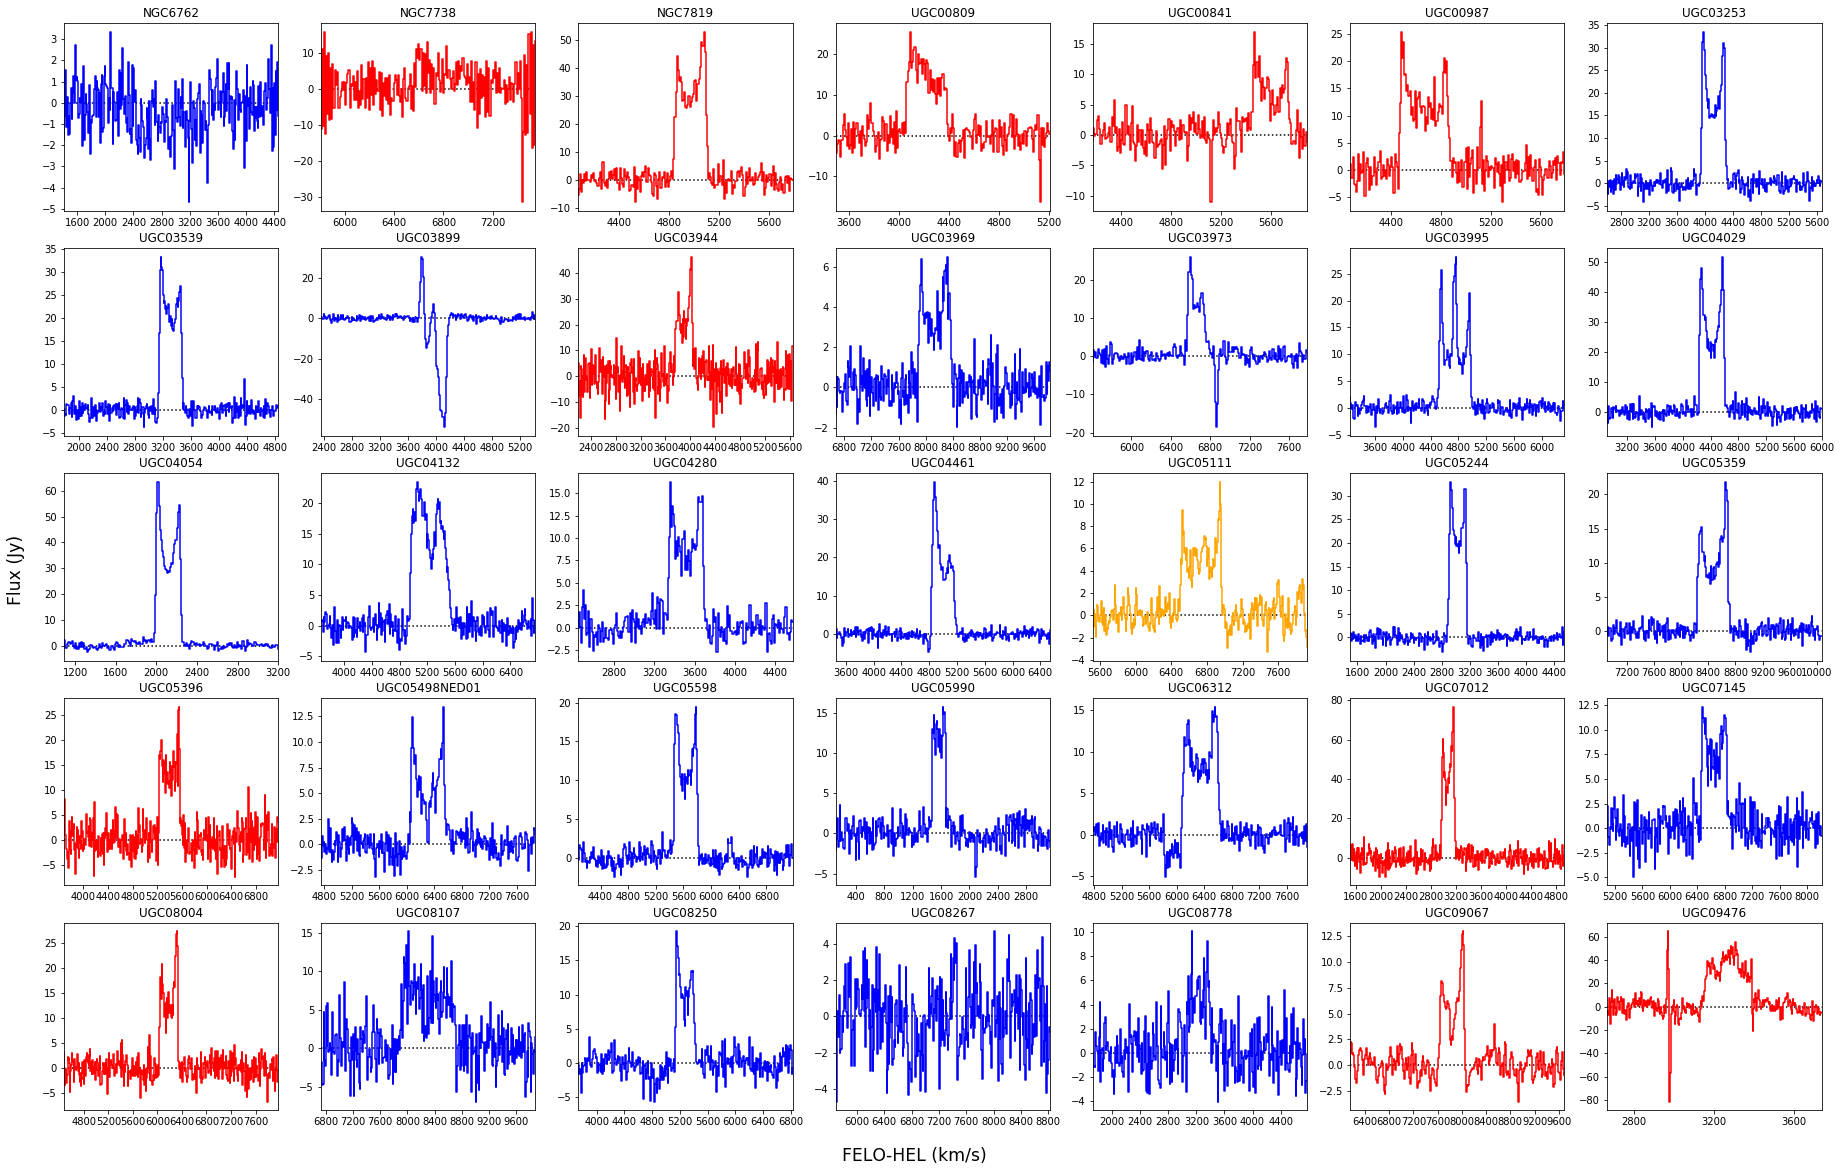

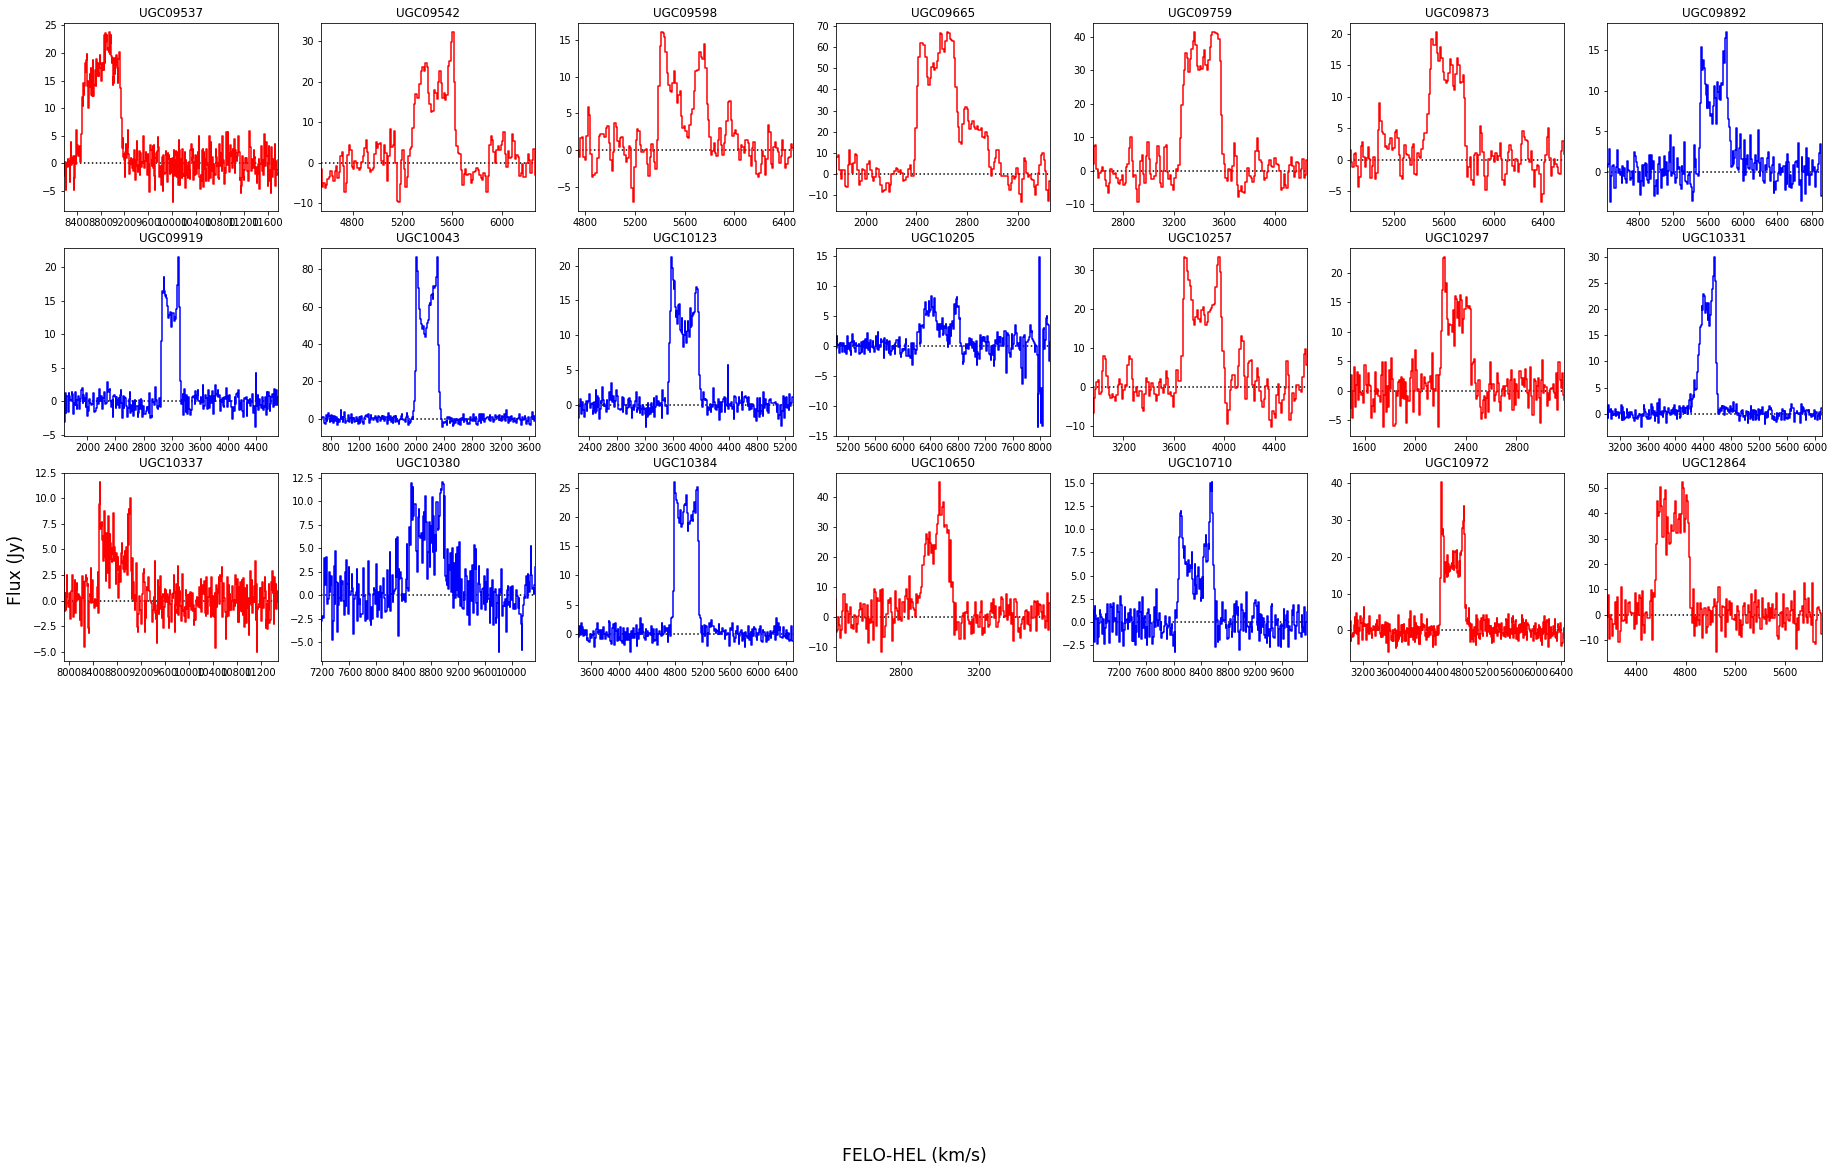

In [3]:
spectab = Table.read('../edge_pydb/dat_prof/hi_spec/hispec_default.csv', format='ascii.ecsv')
gallist = unique(spectab, keys='Name').columns[0].tolist()
print('Number of galaxies: {}'.format(len(gallist)))
pages = int(np.ceil(float(len(gallist)) / (nx*ny)))

with PdfPages('hispec_sdish.pdf') as pdf:

    for num in range(0,pages):
        aa = nx*ny*num
        bb = nx*ny+aa
        sublist = gallist[aa:bb]

        fig = plt.figure(0)
        fig.set_size_inches(nx*4.5, ny*4.)

        for idx, gal in enumerate(sublist):
            galrows = spectab[spectab['Name']==gal]
            row, col = divmod(idx,nx)
            ax = plt.subplot2grid((ny,nx),(row,col))
            ax.axhline(y=0, xmin=0, xmax=1, color='black', ls=':')

            vel = galrows['vbary']
            flux   = galrows['hiflux']
            src = galrows['source'][0]
            if src in sources:
                color = colors[sources.index(src)]
            else:
                color = 'magenta'
            spec  = ax.step(vel, flux, color=color, where='mid')
            ax.set_xlim(vel[0], vel[-1])
            plt.tick_params(axis='x', labelsize='medium')
            plt.tick_params(axis='y', labelsize='medium')
            start, end = ax.get_xlim()
            if (end-start)>1000:
                majorLocator = MultipleLocator(400)
            else:
                majorLocator = MultipleLocator(200)
            ax.xaxis.set_major_locator(majorLocator)
            ax.set_title(gal, fontsize='large')

        fig.text(0.5, 0.09, 'FELO-HEL (km/s)', ha='center',
                    fontsize='xx-large')
        fig.text(0.1, 0.5, 'Flux (Jy)', va='center', rotation='vertical', 
                    fontsize='xx-large')
        pdf.savefig(bbox_inches = 'tight', pad_inches=0.1)
        plt.show()
        plt.close()